# MLFlow

In [ ]:
!pip install dagshub mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import mlflow
import dagshub

import mlflow.tensorflow
from mlflow.models.signature import infer_signature

# Set up MLflow tracking
dagshub.init(repo_owner='simoLoc', repo_name='ProgettoSE4AI', mlflow=True)

# Funzione che attiva il logging automatico di iperparametri, metriche ecc, a seconda della libreria usata.
# Eventualmente possiamo specificarne altre manualmente con mlflow.log_metric()
mlflow.autolog()

mlflow.tensorflow.autolog()

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=c472aec6-f83d-45cc-b9d7-262378ffb1f7&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=b922db26f2c3300d71575682357ad8de930b94358018d597829fb0ec0371d369




Output()

KeyboardInterrupt: 

# Import Librerie


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# libreria di metriche di fairness
!pip install aif360
!pip install 'aif360[Reductions]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.6 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import shutil
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # plotting
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import seaborn as sns
from PIL import Image
import copy
from tqdm.keras import TqdmCallback

# Analisi del dataset UTKFace

Apertura CSV degli attributi, con conseguente creazione del Data Frame.

In [ ]:
# apertura CSV degli attributi
data_dir = '/content/drive/Shareddrives/ProgettoSE4AI/datasetUTK/'
img_dir = data_dir + 'images_UTKFace'
csv_dir = data_dir + "list_attr_utk.csv"

if os.path.exists(csv_dir):
  df_attr = pd.read_csv(csv_dir, delimiter=',')
  df_attr.dataframeName = 'list_attr_utk.csv'
  df_attr.set_index('img_name', inplace=True)
  nRow, nCol = df_attr.shape
  print(f'There are {nRow} rows and {nCol} columns')
else:
  print("File not found")

print(df_attr.head(5))

There are 23705 rows and 3 columns
                                        age  gender  ethnicity
img_name                                                      
100_0_0_20170112213500903.jpg.chip.jpg  100       0          0
100_0_0_20170112215240346.jpg.chip.jpg  100       0          0
100_1_0_20170110183726390.jpg.chip.jpg  100       1          0
100_1_0_20170112213001988.jpg.chip.jpg  100       1          0
100_1_0_20170112213303693.jpg.chip.jpg  100       1          0


Dimensione: (200, 200)


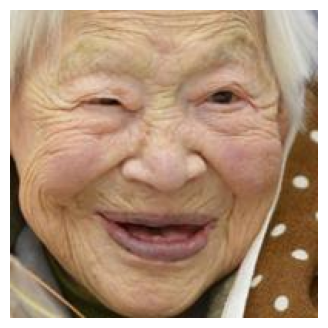

age          116
gender         1
ethnicity      2
Name: 116_1_2_20170112220255503.jpg.chip.jpg, dtype: int64


In [ ]:
# visualizzazione imamgine d'esempio
img_dir = data_dir + 'images_UTKFace/'
img = '116_1_2_20170112220255503.jpg.chip.jpg'
example_img = os.path.join(img_dir, img)

example_img = '/content/drive/Shareddrives/ProgettoSE4AI/datasetUTK/images_UTKFace/116_1_2_20170112220255503.jpg.chip.jpg'
img = Image.open(example_img)
print("Dimensione:", img.size)
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis('off')
plt.show()
attrs = df_attr.loc['116_1_2_20170112220255503.jpg.chip.jpg', ['age', 'gender', 'ethnicity']]
print(attrs)

Age da intero ad etichetta 'Young', 'Adult', 'Senior' e 'Elderly'.

In [ ]:
# lista di paths e labels
file_names = df_attr.index.to_list()
file_paths = [os.path.join(img_dir, fn) for fn in file_names]
labels = df_attr[['age', 'gender', 'ethnicity']].to_numpy()

age_labels = pd.cut(df_attr['age'], bins=[0, 20, 50, 80, 120], labels=[0, 1, 2, 3])

# Sostituisci la prima colonna (indice 0) di labels con i valori di age_labels
labels[:, 0] = age_labels.to_numpy()


Plot del numero di immaggini per etnia, genere e fascie d'età.

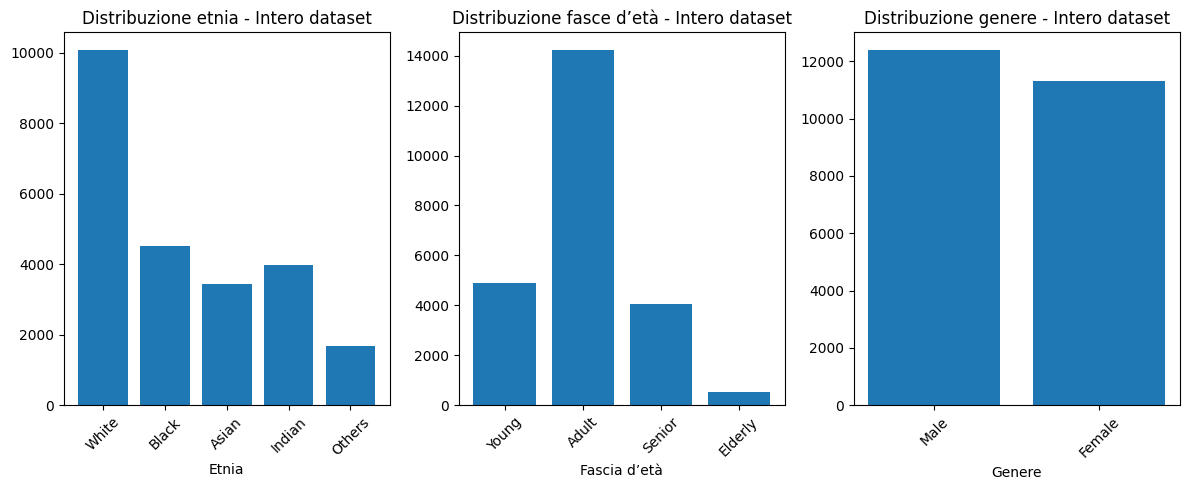

In [ ]:
# Conteggi per ciascuna classe di etnia
ethnicity_counts = np.bincount(labels[:, 2].astype(int), minlength=5)

# Conteggi per ciascuna fascia d’età
age_counts = np.bincount(labels[:, 0].astype(int), minlength=4)

# Conteggi per ciascun genere
gender_counts = np.bincount(labels[:, 1].astype(int), minlength=2)


# Definizione dei nomi delle classi

ethnicity_classes = ['White', 'Black', 'Asian', 'Indian', 'Others']
age_classes       = ['Young', 'Adult', 'Senior', 'Elderly']
gender_classes    = ['Male', 'Female']

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Riduciamo lo spazio orizzontale tra i plot
plt.subplots_adjust(wspace=0.4)


# --- Etnia ---
axs[0].bar(ethnicity_classes, ethnicity_counts)
axs[0].set_xlabel('Etnia')
axs[0].set_title('Distribuzione etnia - Intero dataset')
axs[0].tick_params(axis='x', rotation=45)

# --- Fasce d’età ---
axs[1].bar(age_classes, age_counts)
axs[1].set_xlabel('Fascia d’età')
axs[1].set_title('Distribuzione fasce d’età - Intero dataset')
axs[1].tick_params(axis='x', rotation=45)

# --- Genere ---
axs[2].bar(gender_classes, gender_counts)
axs[2].set_xlabel('Genere')
axs[2].set_title('Distribuzione genere - Intero dataset')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Rimozione di 3500 elementi dove con etnia = White e fascia di età = Adult.

In [ ]:
age_labels = pd.cut(
    df_attr['age'],
    bins=[0, 20, 50, 80, 120],
    labels=[0, 1, 2, 3]
)
adult_white_idx = df_attr[
    (df_attr['ethnicity'] == 0) &      # 0=White
    (age_labels == 1)                  # età [20–50)
].index

rng = np.random.RandomState(42)
to_drop = rng.choice(adult_white_idx, size=3500, replace=False)
df_filtered = df_attr.drop(to_drop)

# --- Ricostruisci file_paths come prima ---
file_names = df_filtered.index.to_list()
file_paths = [os.path.join(img_dir, fn) for fn in file_names]

# --- Ricalcola labels e riapplica il binning ---
labels = df_filtered[['age','gender','ethnicity']].to_numpy()

new_age_labels = pd.cut(
    df_filtered['age'],
    bins=[0, 20, 50, 80, 120],
    labels=[0, 1, 2, 3]
).to_numpy()
labels[:, 0] = new_age_labels

df_attr = df_filtered

Split del dataset in 80\% train set e 20\% test set.

In [ ]:
# --- Split train/test ---
train_paths, test_paths, train_labels_np, test_labels_np = train_test_split(
    file_paths,
    labels,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [ ]:
# salvataggio dello split
np.save(os.path.join(data_dir, 'train_labels.npy'), train_labels_np)
np.save(os.path.join(data_dir, 'test_labels.npy'), test_labels_np)
np.save(os.path.join(data_dir, 'train_paths.npy'), train_paths)
np.save(os.path.join(data_dir, 'test_paths.npy'), test_paths)

Plot dopo la rimozione di 3500 elementi, diviso per trian e test set.

<ipython-input-10-809712412646>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(class_labels, rotation=45)
<ipython-input-10-809712412646>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(class_labels, rotation=45)


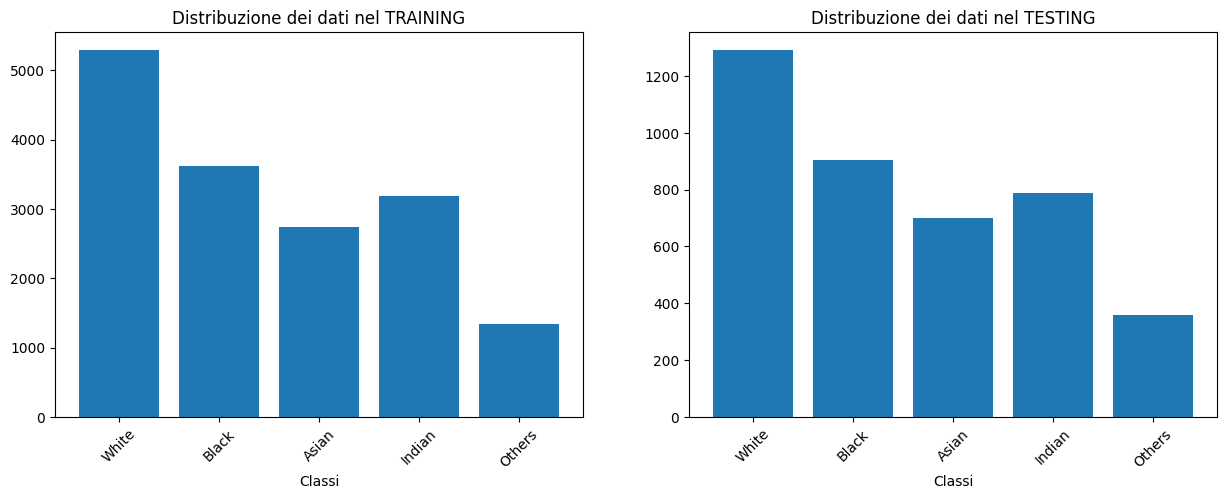

<ipython-input-10-809712412646>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(class_labels, rotation=45)
<ipython-input-10-809712412646>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(class_labels, rotation=45)


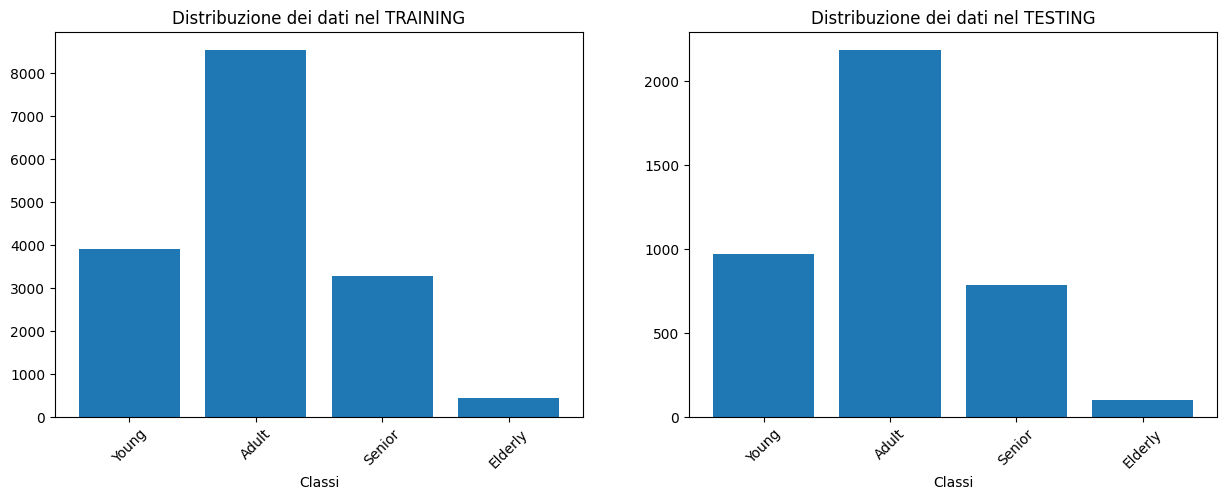

<ipython-input-10-809712412646>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(class_labels, rotation=45)
<ipython-input-10-809712412646>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(class_labels, rotation=45)


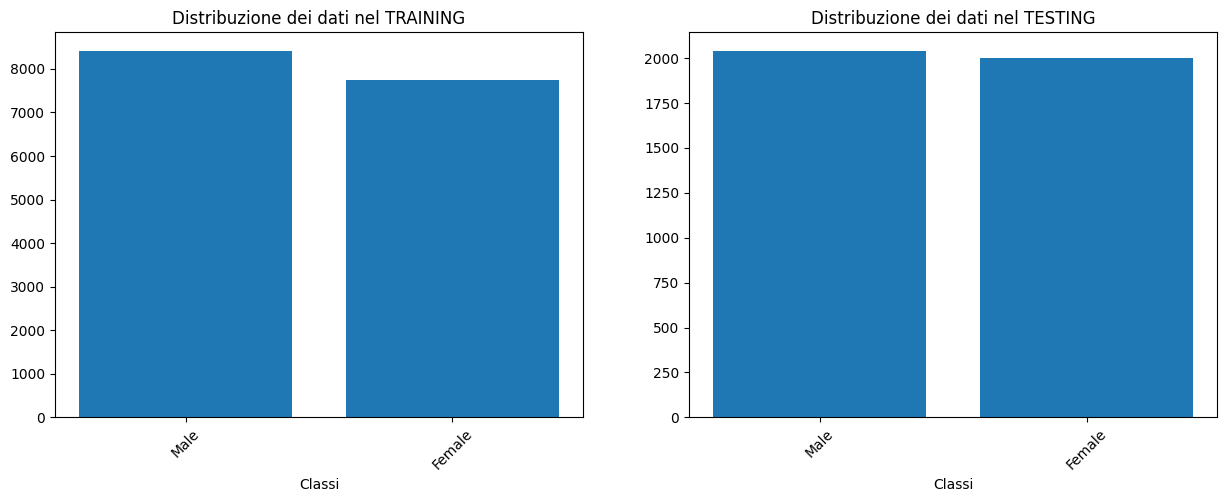

In [ ]:
def plot_lablels(class_labels, train_labels_np, test_labels_np):
  # conta il numero di elementi per classe
  # dataset_train.targets è la lista delle classi delle istanze
  class_count_train = np.bincount(train_labels_np.flatten(), minlength=5)[:len(class_labels)]
  class_count_test = np.bincount(test_labels_np.flatten(), minlength=5)[:len(class_labels)]

  # definizione del nome delle classi
  # class_labels = ['White', 'Black', 'Asian', 'Indian', 'Others']


  fig, axs = plt.subplots(1, 2, figsize=(15, 5))

  # sottografico per i dati di training
  axs[0].bar(class_labels, class_count_train)
  axs[0].set_xlabel('Classi')
  axs[0].set_title('Distribuzione dei dati nel TRAINING')
  axs[0].set_xticklabels(class_labels, rotation=45)

  # sottografico per i dati di testing
  axs[1].bar(class_labels, class_count_test)
  axs[1].set_xlabel('Classi')
  axs[1].set_title('Distribuzione dei dati nel TESTING')
  axs[1].set_xticklabels(class_labels, rotation=45)
  plt.show()

plot_lablels(['White', 'Black', 'Asian', 'Indian', 'Others'], train_labels_np[:, 2], test_labels_np[:, 2])
plot_lablels(['Young', 'Adult', 'Senior', 'Elderly'], train_labels_np[:, 0], test_labels_np[:, 0])
plot_lablels(['Male', 'Female'], train_labels_np[:, 1], test_labels_np[:, 1])

Creazione del `tf.data.Dataset`a partire dal dataframe in precedenza inizializzato, effettua il parsing e il preprocessing delle immagini. In particolare, le trasformazioni effettuate sono:
* `Rescaling`, il quale effettua uno scaling dei valori in un range da 0 a 1, poichè i modelli di deep learning funzionano meglio con valori normalizzati;
* `Normalize`, il quale di standardizzare i dati in un range da [-1, 1], sottraendo per la media e dividendo per la deviazione standard. Prende in input due tuple (che indicano media e deviazione standard) con tre elementi (Red, Green e Blue).



In [ ]:
train_paths = np.load(data_dir + 'train_paths.npy')
test_paths = np.load(data_dir + 'test_paths.npy')
test_labels_np = np.load(data_dir + 'test_labels.npy')
train_labels_np = np.load(data_dir + 'train_labels.npy')


# layers di preprocessing
rescale = tf.keras.layers.Rescaling(1.0 / 255.0)
normalization = tf.keras.layers.Normalization(
    mean=[0.485, 0.456, 0.406],
    variance=[0.229, 0.224, 0.225]
)

# funzione di parsing e preprocessing
@tf.function
def parse_image(path):
    # leggi
    img = tf.io.read_file(path)
    # decodifica come immagine RGB
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    # le immagini originali sono 200x200
    img = tf.image.resize(img, [200, 200])
    # applica rescaling e normalization
    img = rescale(img)
    img = normalization(img)
    return img


# Prepara il dataset completo immagini + label
def create_dataset(image_paths, labels_array):
    AUTOTUNE = tf.data.AUTOTUNE

    images = tf.data.Dataset.from_tensor_slices(image_paths)
    labels = tf.data.Dataset.from_tensor_slices(labels_array)

    dataset = (
        tf.data.Dataset.zip((images, labels))
        .map(lambda path, label: (
            parse_image(path),
            {
                'age': label[0],
                'gender': label[1],
                'ethnicity': label[2]
            }
        ), num_parallel_calls=AUTOTUNE)
        .prefetch(AUTOTUNE)
    )
    return dataset

# Dataset unificati
train_dataset = create_dataset(train_paths, train_labels_np)
test_dataset = create_dataset(test_paths, test_labels_np)

# Verifica
for image, label in train_dataset.take(1):
    print("Image shape:", image.shape)
    print("Label:", label)

Image shape: (200, 200, 3)
Label: {'age': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'gender': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'ethnicity': <tf.Tensor: shape=(), dtype=int64, numpy=3>}


In [ ]:
dic = {
  "age": {
    "0": "young",
    "1": "adult",
    "2": "senior",
    "3": "elderly"
  },
  "ethnicity": {
    "0": "White",
    "1": "Black",
    "2": "Asian",
    "3": "Indian",
    "4": "Others"
  },
  "gender": {
    "0": "Male",
    "1": "Female"
  }
}